<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{-{0.01}x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

### Respuesta:

Como vimos en los slides de la primer clase, la fda de la distribución exponencial es:

$$
Fda ( x ) = \begin{cases}
~~ 1 - e^{λ}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

y sabiendo que λ = 0.01 el area bajo la curva toma la siguiente forma:

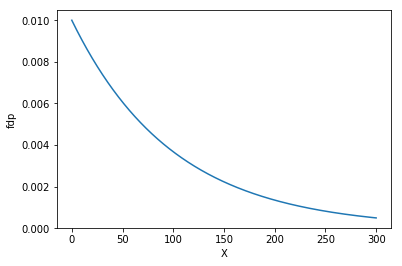

In [28]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 300, 3000)
yfdp = 0.01 * np.exp(-0.01 * x)

plt.plot(x, yfdp)
plt.xlabel('X')
plt.ylabel('fdp')
plt.show()


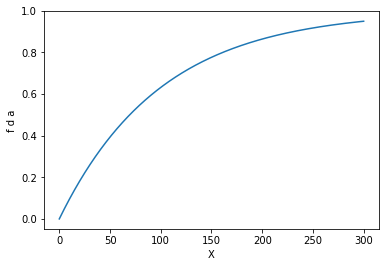

In [29]:
yfda = 1 - np.exp(- 0.01 * x)

plt.plot(x, yfda)
plt.xlabel('X')
plt.ylabel('f d a')
plt.show()

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?
* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

### Respuesta

Reemplazamos en la fda a x por 150 y le restamos la fda con x = 50
Para el segundo punto reemplazamos a x por 100 en la fda.

In [23]:
fda50 = 1 - np.exp(-0.01 * 50) 
fda100 = 1 - np.exp(-0.01 * 100) 
fda150 = 1 - np.exp(-0.01 * 150) 

print("La probabilidad de que funcione entre 50 y 150 es: " + str(fda150-fda50))
print("La probabilidad de que funcione entre 100 es: " + str(fda100))

La probabilidad de que funcione entre 50 y 150 es: 0.38340049956420363
La probabilidad de que funcione entre 100 es: 0.6321205588285577


## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20,30)

In [2]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       0.049879
std        5.005364
min      -18.514999
25%       -3.339493
50%        0.076013
75%        3.427273
max       21.178027


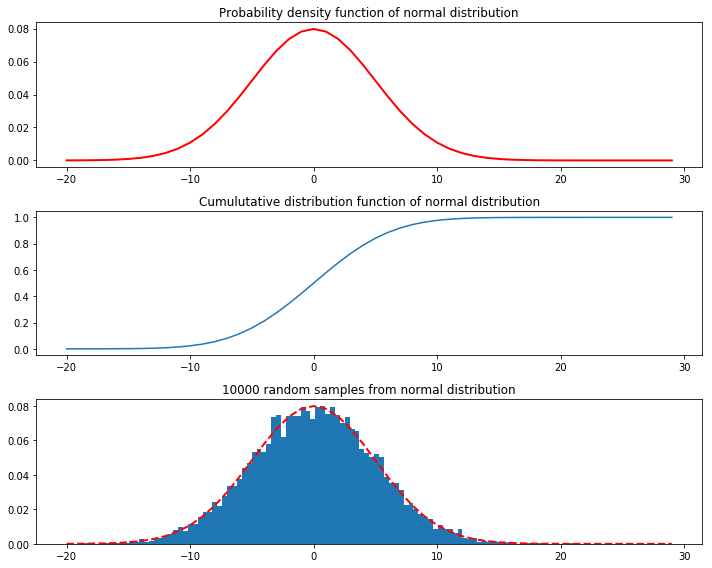

In [3]:
graphic_normal(mu, sigma, rng)